# Setup

In [13]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import sklearn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Questions

## Data visualisation

* Use standard visualisation techniques to understand the ml.csv dataset

In [1]:
import pandas as pd
df = pd.read_csv('../data/ml.csv')
print(df.head)

<bound method NDFrame.head of            x0        x1        x2        x3        x4        x5        x6  \
0    0.059856 -0.613184  2.322512  0.564453  0.564453 -1.537281  0.651346   
1   -0.583660 -1.716858 -0.536196  1.132689  1.132689  3.363117 -0.344752   
2    0.632819  0.754014  0.548169 -3.061347 -3.061347  1.723483 -1.107925   
3    0.666025 -1.231859 -0.615159 -0.096564 -0.096564 -2.362081 -0.926052   
4    0.059144 -0.159858  1.185429  1.675701  1.675701 -2.002485  0.718597   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.089335 -0.707953 -1.601152  3.344799  3.344799 -2.138397 -0.535857   
996  0.796263 -0.544059  1.923068 -1.213895 -1.213895 -4.863790  0.970886   
997  0.006266  0.677183  1.111781 -0.392983 -0.392983  0.757790 -0.678159   
998 -0.598648 -1.018163 -0.892881  3.886200  3.886200  0.531769  1.616102   
999 -0.731184 -1.105933  2.592094  0.478146  0.478146 -2.476153  0.023083   

           x7        x8        x9  ...       

In [2]:
# finding the count of each class
df["y"].value_counts()

0    501
1    499
Name: y, dtype: int64

In [5]:
# finding correlation between features helping us better identify which features are distinct
corr_matrix = df.corr(method ='pearson')
print(corr_matrix)

           x0        x1        x2        x3        x4        x5        x6  \
x0   1.000000 -0.049540  0.007413 -0.005705 -0.005705 -0.016650  0.022333   
x1  -0.049540  1.000000 -0.039860 -0.052938 -0.052938  0.008249  0.010237   
x2   0.007413 -0.039860  1.000000  0.135991  0.135991 -0.007987  0.001627   
x3  -0.005705 -0.052938  0.135991  1.000000  1.000000 -0.105154 -0.002918   
x4  -0.005705 -0.052938  0.135991  1.000000  1.000000 -0.105154 -0.002918   
x5  -0.016650  0.008249 -0.007987 -0.105154 -0.105154  1.000000 -0.030201   
x6   0.022333  0.010237  0.001627 -0.002918 -0.002918 -0.030201  1.000000   
x7   0.022376  0.044216 -0.165043 -0.072065 -0.072065 -0.046705 -0.004996   
x8   0.031395  0.075014  0.027992  0.034083  0.034083  0.001946  0.009716   
x9   0.022463  0.008502  0.035532 -0.106951 -0.106951 -0.052355 -0.012347   
x10  0.012997  0.006042 -0.219052 -0.556873 -0.556873  0.619836 -0.012314   
x11 -0.001660  0.003005  0.356885 -0.295746 -0.295746 -0.204620  0.020824   

In [10]:
print('Std. Dev: ')
print(df.std())
print('\n'*5)
print('Mean: ')
print(df.mean())
print("\n"*5)
print('Variance': )
print(df.var())

Std. Dev: 
x0     1.013009
x1     1.029640
x2     2.009109
x3     1.978090
x4     1.978090
x5     2.107363
x6     1.002618
x7     2.202802
x8     1.040565
x9     1.988208
x10    3.897085
x11    3.731091
x12    0.992347
x13    1.981376
x14    2.138400
x15    0.972541
x16    2.223097
x17    2.009710
x18    2.009109
x19    1.990348
y      0.500249
dtype: float64






Mean: 
x0    -0.033344
x1    -0.023231
x2    -0.395385
x3     0.006166
x4     0.006166
x5     0.239333
x6     0.030522
x7    -0.421310
x8     0.047228
x9     0.171481
x10    0.727083
x11   -0.630073
x12    0.015511
x13   -0.395275
x14    0.063600
x15    0.014615
x16    0.209988
x17    0.387723
x18   -0.395385
x19   -0.539941
y      0.499000
dtype: float64






x0      1.026187
x1      1.060158
x2      4.036520
x3      3.912841
x4      3.912841
x5      4.440978
x6      1.005243
x7      4.852337
x8      1.082776
x9      3.952971
x10    15.187275
x11    13.921037
x12     0.984752
x13     3.925852
x14     4.572755
x15     0.945

{'whiskers': [<matplotlib.lines.Line2D at 0x16934d6ed00>,
 'caps': [<matplotlib.lines.Line2D at 0x16934e4c400>,
 'boxes': [<matplotlib.lines.Line2D at 0x16934d6e9a0>,
 'medians': [<matplotlib.lines.Line2D at 0x16934e4cac0>,
 'fliers': [<matplotlib.lines.Line2D at 0x16934e4ce20>,
 'means': []}

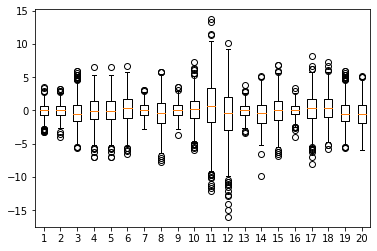

In [36]:
import matplotlib.pyplot as plt
data = []
for i, key in enumerate(df):
    if i==20:
        break
    data.append(df[key])
plt.boxplot(data)



## Machine learning

* Establish a reliable roc_auc metric for this data set using a cross validation technique to predict y from x using a random forest.


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [45]:
X = df.iloc[:, 0:20].values
y = df.iloc[:, 20].values

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
train, test = train_test_split(df, test_size=0.2)

In [48]:
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
155,0.722305,-0.086976,-1.410162,3.010302,3.010302,-2.908984,-0.950755,0.569025,-0.471575,-0.635998,...,-2.526732,0.207096,1.205963,0.042410,1.029398,1.068237,0.527904,-1.410162,0.674124,1
992,-1.522954,-0.296855,-1.175696,3.162074,3.162074,0.009748,1.852291,-2.624109,-0.790954,3.006469,...,-1.236706,-1.951776,-4.462623,-1.103354,0.321459,-1.501651,2.514870,-1.175696,-1.982861,0
428,2.036348,-0.018707,-0.278959,-0.020377,-0.020377,-0.440557,-0.698697,0.442454,0.347518,2.772847,...,1.619093,0.753531,0.041163,-0.458431,-0.241678,0.034886,-1.437983,-0.278959,-1.810134,1
922,0.110945,0.464275,2.620303,1.849959,1.849959,-1.028880,0.471319,0.199481,-1.956407,1.996052,...,4.767890,-2.627425,-1.843197,1.978296,-1.513738,1.082232,-3.740277,2.620303,-0.448234,1
8,-1.577806,2.585791,-2.321250,0.278962,0.278962,-0.270277,-1.566031,-1.495401,-0.744040,-1.056380,...,-3.056876,1.997500,1.155608,-0.941438,-2.190603,1.934730,0.116357,-2.321250,1.250739,1


In [66]:
from sklearn.model_selection import cross_validate
models = []
for item in [5,10,20,25,30]:
    clf = RandomForestClassifier(n_estimators=item, random_state=0)
    cv_results = cross_validate(clf, X_train, y_train, cv=5)
    scores = sorted(cv_results['test_score'])
    models.append(clf)
    print(scores)
    

[0.68125, 0.725, 0.7375, 0.76875, 0.7875]
[0.71875, 0.7375, 0.7375, 0.76875, 0.775]
[0.73125, 0.75625, 0.76875, 0.775, 0.8125]
[0.725, 0.75625, 0.75625, 0.7625, 0.7875]
[0.73125, 0.75625, 0.76875, 0.78125, 0.7875]


In [72]:
models[2].fit(X_train, y_train)
y_pred = models[2].predict(X_test)

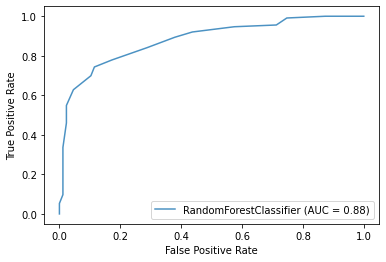

In [80]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(models[2], X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## Bonus

* How would you verify the model has has established which features are important and those that are not.

In [82]:
# Create a selector object that will use the random forest classifier to identify
sfm = SelectFromModel(models[2])
# Train the selector
sfm.fit(X_train, y_train)
features = df.columns.values[:-1]
print(features[sfm.get_support()])

['x2' 'x7' 'x9' 'x10' 'x16' 'x18']
